In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('date.csv')
df.head()



,일시,지점,평균기온(°C),일강수량(mm),sale
0,2021-01-01,108,-4.2,NaN,615110
1,2021-01-02,108,-5.0,NaN,296620
2,2021-01-04,108,-3.5,0.0,259900
3,2021-01-05,108,-5.5,0.0,248520
4,2021-01-06,108,-7.4,2.3,469800


In [2]:
df.dtypes

일시           object
지점            int64
평균기온(°C)    float64
일강수량(mm)    float64
sale          int64
dtype: object

             지점  평균기온(°C)  일강수량(mm)    sale
일시                                         
2021-01-31  108      -4.2       NaN  615110
2021-01-31  108      -5.0       NaN  296620
2021-01-31  108      -3.5       0.0  259900
2021-01-31  108      -5.5       0.0  248520
2021-01-31  108      -7.4       2.3  469800


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text

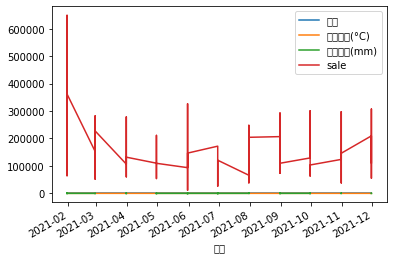

In [3]:
from pandas.tseries.offsets import MonthEnd 
df['일시'] = pd.to_datetime(df['일시']) + MonthEnd(1)
df = df.set_index('일시')

print(df.head()) 
df.plot()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


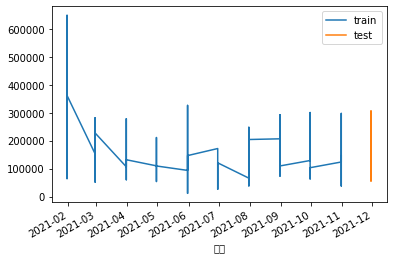

In [4]:
split_date = pd.Timestamp('11-01-2021')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['sale']]
test = df.loc[split_date:, ['sale']]
# Feature는 Unadjusted 한 개

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc




array([[0.94698776],
       [0.44731723],
       [0.38970819],
       [0.37185441],
       [0.71901475],
       [1.        ],
       [0.5679636 ],
       [0.08278946],
       [0.431754  ],
       [0.23476624],
       [0.14857233],
       [0.37274867],
       [0.4355193 ],
       [0.33326012],
       [0.40116097],
       [0.26647317],
       [0.19312833],
       [0.14323816],
       [0.31644179],
       [0.19639159],
       [0.54992156],
       [0.22136806],
       [0.26732036],
       [0.15484782],
       [0.26132727],
       [0.16405711],
       [0.41501412],
       [0.23674302],
       [0.17048949],
       [0.42516473],
       [0.22121117],
       [0.27878883],
       [0.26137433],
       [0.35946031],
       [0.18834327],
       [0.25549106],
       [0.21932852],
       [0.22999686],
       [0.26733605],
       [0.14857233],
       [0.23642924],
       [0.06306872],
       [0.18669595],
       [0.33699404],
       [0.3387198 ],
       [0.14919987],
       [0.41826169],
       [0.183

In [6]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


,Scaled
일시,
2021-01-31,0.946988
2021-01-31,0.447317
2021-01-31,0.389708
2021-01-31,0.371854
2021-01-31,0.719015


In [7]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)



,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
일시,,,,,,,,,,,,,
2021-01-31,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN


In [8]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]



In [9]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
일시,,,,,,,,,,,,
2021-01-31,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988
2021-01-31,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317
2021-01-31,0.333260,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708
2021-01-31,0.401161,0.333260,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854
2021-01-31,0.266473,0.401161,0.333260,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015


In [10]:
y_train.head()

,Scaled
일시,
2021-01-31,0.435519
2021-01-31,0.333260
2021-01-31,0.401161
2021-01-31,0.266473
2021-01-31,0.193128


In [11]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
#print(y_train_shape)
print(y_train)


(265, 12)
[[0.37274867 0.14857233 0.23476624 ... 0.38970819 0.44731723 0.94698776]
 [0.4355193  0.37274867 0.14857233 ... 0.37185441 0.38970819 0.44731723]
 [0.33326012 0.4355193  0.37274867 ... 0.71901475 0.37185441 0.38970819]
 ...
 [0.39213994 0.04157515 0.16449639 ... 0.16987763 0.44439912 0.35872294]
 [0.11837151 0.39213994 0.04157515 ... 0.08111076 0.16987763 0.44439912]
 [0.40563226 0.11837151 0.39213994 ... 0.25474584 0.08111076 0.16987763]]
[[0.4355193 ]
 [0.33326012]
 [0.40116097]
 [0.26647317]
 [0.19312833]
 [0.14323816]
 [0.31644179]
 [0.19639159]
 [0.54992156]
 [0.22136806]
 [0.26732036]
 [0.15484782]
 [0.26132727]
 [0.16405711]
 [0.41501412]
 [0.23674302]
 [0.17048949]
 [0.42516473]
 [0.22121117]
 [0.27878883]
 [0.26137433]
 [0.35946031]
 [0.18834327]
 [0.25549106]
 [0.21932852]
 [0.22999686]
 [0.26733605]
 [0.14857233]
 [0.23642924]
 [0.06306872]
 [0.18669595]
 [0.33699404]
 [0.3387198 ]
 [0.14919987]
 [0.41826169]
 [0.18355821]
 [0.2282711 ]
 [0.10385943]
 [0.30508315]


In [12]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)



최종 DATA
(265, 12, 1)
[[[0.37274867]
  [0.14857233]
  [0.23476624]
  ...
  [0.38970819]
  [0.44731723]
  [0.94698776]]

 [[0.4355193 ]
  [0.37274867]
  [0.14857233]
  ...
  [0.37185441]
  [0.38970819]
  [0.44731723]]

 [[0.33326012]
  [0.4355193 ]
  [0.37274867]
  ...
  [0.71901475]
  [0.37185441]
  [0.38970819]]

 ...

 [[0.39213994]
  [0.04157515]
  [0.16449639]
  ...
  [0.16987763]
  [0.44439912]
  [0.35872294]]

 [[0.11837151]
  [0.39213994]
  [0.04157515]
  ...
  [0.08111076]
  [0.16987763]
  [0.44439912]]

 [[0.40563226]
  [0.11837151]
  [0.39213994]
  ...
  [0.25474584]
  [0.08111076]
  [0.16987763]]]
[[0.4355193 ]
 [0.33326012]
 [0.40116097]
 [0.26647317]
 [0.19312833]
 [0.14323816]
 [0.31644179]
 [0.19639159]
 [0.54992156]
 [0.22136806]
 [0.26732036]
 [0.15484782]
 [0.26132727]
 [0.16405711]
 [0.41501412]
 [0.23674302]
 [0.17048949]
 [0.42516473]
 [0.22121117]
 [0.27878883]
 [0.26137433]
 [0.35946031]
 [0.18834327]
 [0.25549106]
 [0.21932852]
 [0.22999686]
 [0.26733605]
 [0.148

In [13]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1)




Epoch 1/100
9/9 [==============================] - 6s 7ms/step - loss: 0.0394
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 12/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 13/100
9/9 [==============================] - 0s 6ms/st

In [15]:
print(X_test_t)

[[[0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]
  [0.15437716]
  [0.31071541]]

 [[0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]
  [0.15437716]]

 [[0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]]

 [[0.104738  ]
  [0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]]

 [[0.10025102]
  [0.104738  ]
  [0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]]

 [[0.06871666]
  [0.10025102]
  [0.104738  ]
  [0.22778475]
  [0.2295262 ]
  [0.13876687]


In [18]:
y_pred = model.predict(X_test_t)
print(y_pred)
print(X_test_t)


[[0.17348664]
 [0.18004793]
 [0.18522768]
 [0.18256667]
 [0.18283632]
 [0.177253  ]
 [0.17286138]
 [0.17359976]
 [0.1864537 ]
 [0.1953695 ]]
[[[0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]
  [0.15437716]
  [0.31071541]]

 [[0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]
  [0.15437716]]

 [[0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]
  [0.09656417]]

 [[0.104738  ]
  [0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.20567932]
  [0.25007844]
  [0.10589896]
  [0.10166301]
  [0.20207091]]

 [[0.10025102]
  [0.104738  ]
  [0.22778475]
  [0.2295262 ]
  [0.13876687]
  [0.08048321]
  [0.16767336]
  [0.17387826]
  [0.205679

In [17]:
# 평균 sale
df.mean()

지점             108.000000
평균기온(°C)        15.523077
일강수량(mm)         7.375940
sale        149090.675585
dtype: float64

In [ ]:
mean = 149090.675585
# pred_input은 우리가 줄 값(사용자가 설정할 값)
#입력 받아야함!!!
input = # 2020-02-10
# 입력값의 sale값을 받아 x-train과 비슷한 값을 도출
pred_input = df.loc[ input, ['sale']]

y_pred = model.predict(pred_input)

if mean>y_pred:
  per = ((mean-y_pred)/mean)*100
  print("평균 매출보다", per,"% 더 낮은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")
elif mean<y_pred:
  per = -((mean-y_pred)/mean)*100
  print("평균 매출보다", per,"% 더 높은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")
else:
  print("평균 매출과 같은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")

